<a href="https://colab.research.google.com/github/Peter-Thong/machine-learning/blob/master/start_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

In [ ]:
layer_outputs = []

for neuron_weights, neuron_bias in zip(weights, biases):
  neuron_output = 0

  for n_input, weight in zip(inputs, neuron_weights):
    neuron_output += n_input*weight

  neuron_output += neuron_bias
  layer_outputs.append(neuron_output)

print(layer_outputs)

[4.8, 1.21, 2.385]


In [ ]:
import numpy as np

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0


In [ ]:
output = np.dot(inputs, weights) + bias
print(output)

4.8


In [ ]:
np.array([[1, 2, 3]])

array([[1, 2, 3]])

In [ ]:
a = [1, 2, 3]
np.expand_dims(np.array(a), axis=0)

array([[1, 2, 3]])

In [ ]:
a = [1, 2, 3]
b = [2, 3, 4]

a = np.array([a])
b = np.array([b]).T

np.dot(a, b)

array([[20]])

In [ ]:
inputs = [[1.0, 2.0, 3.0, 2.5],
 [2.0, 5.0, -1.0, 2.0],
 [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1.0],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]


In [ ]:
output = np.dot(inputs, np.array(weights).T) + bias
print(output)

[[ 4.8    0.21   3.885]
 [ 8.9   -2.81   1.7  ]
 [ 1.41   0.051  1.526]]


In [ ]:
inputs = [[1, 2, 3, 2.5], [2., 5., -1., 2], [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1],
[0.5, -0.91, 0.26, -0.5],
[-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]
weights2 = [[0.1, -0.14, 0.5],
[-0.5, 0.12, -0.33],
[-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

In [ ]:
layer1_output = np.dot(inputs, np.array(weights).T) + biases
layer2_output = np.dot(layer1_output, np.array(weights2).T) + biases2

print(layer2_output)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [ ]:
pip install nnfs


In [ ]:
from nnfs.datasets import spiral_data

In [ ]:
import numpy as np
import nnfs

nnfs.init()

In [ ]:
print(0.01 * np.random.randn(2, 5))

[[ 0.01764052  0.00400157  0.00978738  0.02240893  0.01867558]
 [-0.00977278  0.00950088 -0.00151357 -0.00103219  0.00410599]]


In [ ]:
class Layer_Dense:

  def __init__(self, n_input, n_neurons):
    self.weights = 0.01 * np.random.randn(n_input, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

In [ ]:
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)

dense1.forward(X)

print(dense1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


In [ ]:
#basic of relu in numPY
import numpy as np
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = np.maximum(0, inputs)
print(output)


[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [ ]:
# relu activation

class Activation_ReLu:

  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

activation1 = Activation_ReLu()

activation1.forward(dense1.output)

print(activation1.output[:5])

[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]
 [0.         0.00031729 0.        ]
 [0.         0.00052666 0.        ]
 [0.         0.00071401 0.        ]]


In [ ]:
#softmax activtion

layer_outputs = [4.8, 1.21, 2.385]
E = 2.71828182846
exp_values = []
for output in layer_outputs:
  exp_values.append(E ** output) # ** - power operator in Python
print('exponentiated values:')
print(exp_values)


exponentiated values:
[121.51041751893969, 3.3534846525504487, 10.85906266492961]


In [ ]:
import numpy as np

layer_outputs = [4.8, 1.21, 2.385]

exp_values = np.exp(layer_outputs)
norm_values = exp_values / np.sum(exp_values)
print(norm_values)

[0.89528266 0.02470831 0.08000903]


In [ ]:
class Activation_Softmax:

  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.outputs = probabilities

In [ ]:
softmax = Activation_Softmax()
softmax.forward([[1, 2, 3]])
print(softmax.outputs)


[[0.09003057 0.24472847 0.66524096]]


In [ ]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)
# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()
# Make a forward pass of our training data through this layer
dense1.forward(X)
# Make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)
# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

print(activation2.output[:5])

In [1]:
import numpy as np
softmax_outputs = np.array([[0.7, 0.1, 0.2],
[0.1, 0.5, 0.4],
[0.02, 0.9, 0.08]])
class_targets = np.array([[1, 0, 0],
[0, 1, 0],
[0, 1, 0]])

print(softmax_outputs * class_targets)

[[0.7 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.9 0. ]]


In [2]:
#Loss calculation

class Loss:

  def calculate(self, output, y):
    sample_losses = self.forward(output, y)

    data_loss = np.mean(sample_losses)
    return data_loss

class Loss_CategoricalCrossentropy(Loss):

  def forward(self, y_pred, y_true):

    samples = len(y_pred)

    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

    if len(y_true.spape) == 1:
      correct_confidences = y_pred_clipped[range(samples), y_true]
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods

In [4]:
#accuracy calculation

import numpy as np
# Probabilities of 3 samples
softmax_outputs = np.array([[0.7, 0.2, 0.1],
[0.5, 0.1, 0.4],
[0.02, 0.9, 0.08]])
# Target (ground-truth) labels for 3 samples
class_targets = np.array([0, 1, 1])

predictions = np.argmax(softmax_outputs, axis=1)

if len(class_targets.shape) == 2:
  class_targets = np.argmax(class_targets, axis=1)

accuracy = np.mean(predictions==class_targets)

print(accuracy)
np.random.randn()

0.6666666666666666


(0, 0) (0.0001, 2e-08)
Approximate derivative for f(x) where x = 0 is 0.00019999999999999998
(1, 2) (1.0001, 2.00040002)
Approximate derivative for f(x) where x = 1 is 4.0001999999987845
(2, 8) (2.0001, 8.000800020000002)
Approximate derivative for f(x) where x = 2 is 8.000199999998785
(3, 18) (3.0001, 18.001200020000002)
Approximate derivative for f(x) where x = 3 is 12.000199999998785
(4, 32) (4.0001, 32.00160002)
Approximate derivative for f(x) where x = 4 is 16.000200000016548


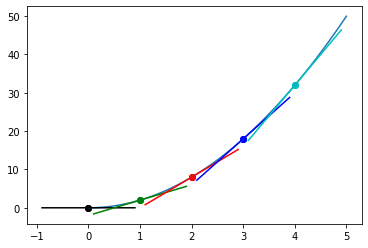

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return 2*x**2

x = np.array(np.arange(0, 5, 0.001))
y = f(x)

plt.plot(x, y)

colors = ['k', 'g', 'r', 'b', 'c']

def approximate_tangent_line(x, approximate_derivative):
  return (approximate_derivative*x) + b

for i in range(5):
  p2_delta = 0.0001
  x1 = i
  x2 = x1+p2_delta

  y1 = f(x1)
  y2 = f(x2)

  print((x1, y1), (x2, y2))
  approximate_derivative = (y2-y1) / (x2-x1)
  b = y2-(approximate_derivative*x2)

  to_plot = [x1-0.9, x1, x1+0.9]
  plt.scatter(x1, y1, c=colors[i])
  plt.scatter(x1, y1, c=colors[i])
  plt.plot([point for point in to_plot],
  [approximate_tangent_line(point, approximate_derivative)
  for point in to_plot],
  c=colors[i])
  print('Approximate derivative for f(x)',
  f'where x = {x1} is {approximate_derivative}')
plt.show()
